In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit  # import the curve fitting function
%matplotlib inline

# Indium-116m

In [47]:
t = 60 #One minute

In [48]:
Cbkd = 22 #Average background count
dCbkd = 1 #uncertainty

In [49]:
Ctot = np.array([2184,1887,1782,1465,1278,1076,990,874,785,678,595,507,458])

In [50]:
Cnet = Ctot - Cbkd
Cnet

array([2162, 1865, 1760, 1443, 1256, 1054,  968,  852,  763,  656,  573,
        485,  436])

In [51]:
Rbkd = Cbkd/t
Rbkd

0.36666666666666664

In [52]:
dRbkd = np.sqrt(Cbkd)/t
dRbkd

0.078173595997057158

In [53]:
R = np.array([entry/t for entry in Ctot])
R

array([ 36.4       ,  31.45      ,  29.7       ,  24.41666667,
        21.3       ,  17.93333333,  16.5       ,  14.56666667,
        13.08333333,  11.3       ,   9.91666667,   8.45      ,   7.63333333])

In [54]:
dR = np.array([np.sqrt(entry)/t for entry in Cnet])
dR

array([ 0.7749552 ,  0.71976076,  0.6992059 ,  0.633114  ,  0.59066817,
        0.54108944,  0.51854497,  0.48648398,  0.46037424,  0.42687495,
        0.39895697,  0.36704526,  0.34801022])

In [55]:
Rnet = np.array([entry - Rbkd for entry in R])
Rnet

array([ 36.03333333,  31.08333333,  29.33333333,  24.05      ,
        20.93333333,  17.56666667,  16.13333333,  14.2       ,
        12.71666667,  10.93333333,   9.55      ,   8.08333333,   7.26666667])

In [56]:
dRnet = np.sqrt(dR**2 + dRbkd**2)
dRnet

array([ 0.7788881 ,  0.72399355,  0.70356236,  0.63792197,  0.59581876,
        0.54670732,  0.52440442,  0.49272485,  0.46696419,  0.43397389,
        0.4065437 ,  0.37527767,  0.35668224])

In [57]:
dCnet = dRnet*t
dCnet

array([ 46.73328578,  43.43961326,  42.21374184,  38.27531842,
        35.74912586,  32.80243893,  31.46426545,  29.563491  ,
        28.01785145,  26.03843313,  24.39262184,  22.5166605 ,  21.40093456])

### #1

In [58]:
Cnet

array([2162, 1865, 1760, 1443, 1256, 1054,  968,  852,  763,  656,  573,
        485,  436])

In [59]:
dCnet

array([ 46.73328578,  43.43961326,  42.21374184,  38.27531842,
        35.74912586,  32.80243893,  31.46426545,  29.563491  ,
        28.01785145,  26.03843313,  24.39262184,  22.5166605 ,  21.40093456])

In [60]:
T = np.array([0,10,20,30,40,50,60,70,80,90,100,110,120])

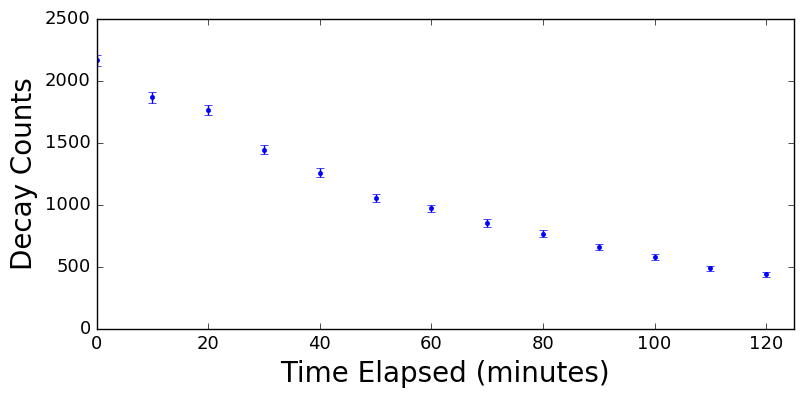

In [81]:
plt.figure(figsize=(9,4))
plt.errorbar(T, Cnet, yerr=dCnet,ls="None",marker='.');
plt.xlim(0,125);
plt.xlabel('Time Elapsed (minutes)',size=20);
plt.ylabel('Decay Counts',size=20);
plt.xticks(size = 13);
plt.yticks(size = 13);

### #2

In [83]:
y = np.array([np.log(entry) for entry in Cnet])
dy = np.array([1/np.sqrt(entry) for entry in Cnet])

In [85]:
dy #All positive

array([ 0.02150662,  0.02315584,  0.02383656,  0.02632491,  0.02821663,
        0.03080206,  0.03214122,  0.03425944,  0.03620243,  0.03904344,
        0.0417756 ,  0.04540766,  0.04789131])

### #3

In [88]:
def myfun(t,C_o,tau):
    ans = np.log(C_o) - t/tau  # this is y, "the function to be fit"
    return ans

In [89]:
p0 = [2200,60]

In [95]:
xlots = np.linspace(0,120)  # need lots of data points for smooth curve
yfit = np.zeros((len(T),xlots.size))

plsq, pcov = curve_fit(myfun, T, y, p0,dy)  # curve fit returns p and covariance matrix
# these give the parameters and the uncertainties
C_o = plsq[0]
eC_o = np.sqrt(pcov[0,0])
tau = plsq[1]
etau = np.sqrt(pcov[1,1])


yfit = myfun(xlots,plsq[0],plsq[1])  # use fit results for a, b, c
    
print('C_o = %.0f +/- %.0f' % (plsq[0], np.sqrt(pcov[0,0])))
print('tau = %.1f +/- %.1f' % (plsq[1], np.sqrt(pcov[1,1])))

C_o = 2174 +/- 28
tau = 74.5 +/- 1.3


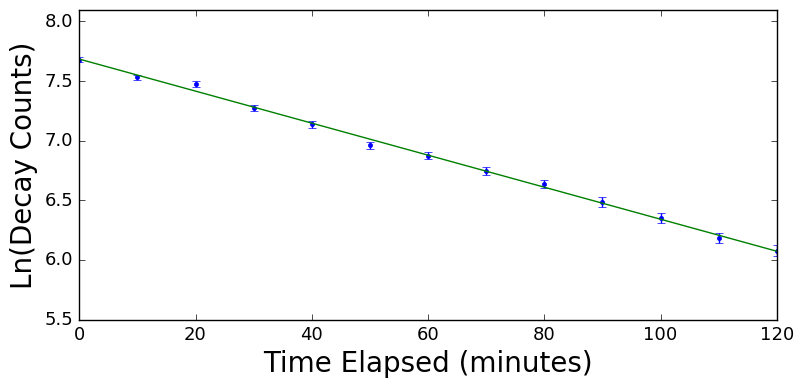

In [103]:
plt.figure(figsize=(9,4))
plt.errorbar(T, y, yerr=dy,ls="None",marker='.');
plt.xlim(0,120);
plt.ylim(5.5,8.1)
plt.xlabel('Time Elapsed (minutes)',size=20);
plt.ylabel('Ln(Decay Counts)',size=20);
plt.xticks(size = 13);
plt.yticks(size = 13);
plt.plot(xlots,yfit);

### #4

In [104]:
Thalf = tau*np.log(2)
Thalf

51.612089523116637

In [106]:
dThalf = etau*np.log(2)
dThalf

0.90956843016693822

From wiki, the half life of Indium-116m is 54.29 minutes